# Fig setup
Using chou 20210513 unsort data Ch9.<br>
shortcaption: <br>
label: Degreed_Freedom

In [1]:
filename = 'Degreed_Freedom'

# Import and functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import import_ipynb
import pandas as pd
import os


try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('C:\\Users\\llinc\\GitHub\\python-code\\Modules')
from SpatialTemporal_Correlation_and_Convolution import STconvolve
from StimulusnResponse import SSG
%matplotlib inline

importing Jupyter notebook from SpatialTemporal_Correlation_and_Convolution.ipynb
importing Jupyter notebook from StimulusnResponse.ipynb


In [3]:
#This function deals with differentiation of angle within [-pi,pi).
#It will fail if angle array x change too fast.
def angular_gradient(x):
    diffx= np.gradient(x)
    diffx[np.abs(diffx)>0.6*np.pi] -= np.pi*diffx[np.abs(diffx)>0.6*np.pi]/abs(diffx[np.abs(diffx)>0.6*np.pi])
    return diffx

In [4]:
def ParaTrans(ASparadict, mag):     # because of overfitting, I assume alpha = mag*beta
    for k in ASparadict.keys():
        globals()[k] = ASparadict[k]
    global beta, alpha, g, l, Amp 
    
    beta = epsilon*2/(1+mag)
    alpha = epsilon*2*mag/(1+mag)
    g = omegastar**2 + (alpha-beta)**2 /4
    l = ((2*omegastar*np.tan(deltastar)*(-beta+gamma)+(alpha-beta)*(beta-gamma)+2*g)/
                (g*(-alpha-beta+2*gamma-2*omegastar*np.tan(deltastar))))
    Amp = Dmp*(g+alpha*beta-alpha*gamma-beta*gamma+gamma**2)/(-beta+gamma+g*l)
    DiffParadict = {'alpha':[], 'beta':[], 'gamma':[], 'g':[], 'l':[], 'tau_y':[], 'Amp':[], 'error':[]}
    for k in DiffParadict.keys():
        DiffParadict[k] = globals()[k]
    return DiffParadict

# Setting parameters from Exp. data

In [5]:
exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\20210513'
direction = 'UD'
cn = 9

## Temporal 

In [6]:
NGD2L1DASpara = np.load(exp_folder + '\\Analyzed_data\\fitNGD2LASpara.npz', allow_pickle=True)
for k in NGD2L1DASpara.files:
    vars()[k] = NGD2L1DASpara[k][()]

pd.DataFrame(para_dict).loc[cn-1]

epsilon       7.163241
gamma        34.901452
omegastar    20.631698
deltastar    -0.450280
tau_y         0.028650
Dmp           3.389743
error         1.308050
Name: 8, dtype: float64

In [8]:
dt = 0.01 #large dt will cause  overflow
Tstep = int(1./dt)
TKtaxis = np.arange(Tstep)*dt

FBFF_para_dict  = pd.DataFrame(ParaTrans(para_dict, 0.1)).loc[cn-1]
FBFF_para_dict

C:\Users\llinc\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


alpha      1.302408
beta      13.024075
gamma     34.901452
g        460.016331
l          0.021331
tau_y      0.028650
Amp      127.832600
error      1.308050
Name: 8, dtype: float64

In [12]:



ratio = np.exp(np.linspace(-2.4,2.4,100))
# ratio = np.arange(1,10)
g_list = []
l_list = []
for i in ratio:
    FBFF_para_dict  = pd.DataFrame(ParaTrans(para_dict, i)).loc[cn-1]
    g_list.append(FBFF_para_dict['g'].copy())
    l_list.append(FBFF_para_dict['l'].copy())
    


C:\Users\llinc\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Text(0.04, 0.92, '(b)')

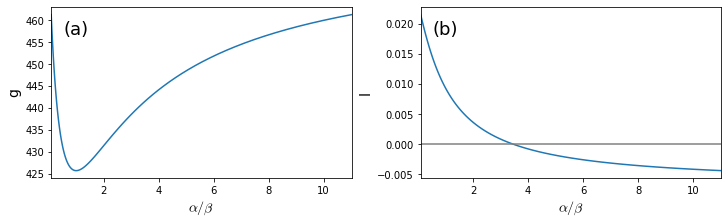

In [26]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["font.size"] = 14
plt.rcParams['xtick.labelsize'] =  10
plt.rcParams['ytick.labelsize'] =  10

fig, ax = plt.subplots(1,2, constrained_layout=True)
fig.set_size_inches(10,3)

for a in ax:
    a.set_xlabel(r'$\alpha / \beta$')
    a.set_xlim([ratio[0], ratio[-1]])
    
ax[0].plot(ratio, g_list)
ax[0].set_ylabel('g')
fig.text(0.04, 0.92, r'(a)', ha='left', va='top', transform=ax[0].transAxes, fontsize = 18)
ax[1].plot(ratio, l_list)
ax[1].set_ylabel('l')
ax[1].axhline(0, c= 'gray')
fig.text(0.04, 0.92, r'(b)', ha='left', va='top', transform=ax[1].transAxes, fontsize = 18)

In [25]:
fig.savefig('D:\\GoogleDrive\\retina\\thesis\\fig\\A\\'+filename+'.png',  bbox_inches='tight', pad_inches=0.1, dpi=300)